## TikTok Reviews Sentiment Analysis

### 1.Overview

TikTok is a popular social media app known for its short and entertaining videos, despite its popularity not everyone shares the same enthusiasm for the platform.

### 2.Target

Analyze TikTok reviews to find out what people think about the content of this app.

### 3.Data set information:

For this project, we will use the TikTok app reviews dataset stored in kaggle (https://www.kaggle.com/datasets/shivkumarganesh/tiktok-google-play-store-review).

This dataset belongs to the TikTok app available on the Google Play Store.

**Attribute Information**

* **userName**: Name of a User.
* **userImage**: Profile Image that a user has.
* **content**: This represents the comments made by a user.
* **score**: Scores/Rating between 1 to 5.
* **thumbsUpCount**: Number of Thumbs up received by a person.
* **reviewCreatedVersion**: Version number on which the review is created.
* **at**: Created At.
* **replyContent**: Reply to the comment by the Company.
* **repliedAt**: Date and time of the above reply.
* **reviewId**: unique identifier.


### 4.Import libraries

In [16]:
# data manipulation
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import plotly.express as px
# used to read the image file as a NumPy array
import imageio.v2 as imageio
# natural language processing tasks / regular expressions /string manipulation
import nltk, re, string
# performs sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
# visualizing the most common words
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Avoid LookupError, raised by the NLTK library
# This will download the VADER (Valence Aware Dictionary and sEntiment Reasoner) 
nltk.download('vader_lexicon')
# This will download a collection of stopwords
nltk.download('stopwords')
# initializes a stemmer object using the English language
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/cnc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /home/cnc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 5.Import Dataset

In [2]:
# Import DataSet (first need to extract or unzip files)
df_tk_review = pd.read_csv('Data/tiktok_google_play_reviews.csv')

# Display a random content:
print(df_tk_review.sample(n=5))

/tmp/ipykernel_197/3727863743.py:2: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tk_review = pd.read_csv('Data/tiktok_google_play_reviews.csv')


                                    reviewId           userName   
448936  3e26b23a-99d4-40fa-86b7-60c89171c2d6    Kushneel Sharma  \
411280  c1353501-ead8-41fa-83cd-8a087ad05b97   Kimbreele Sucess   
108253  1acdc68a-f37e-43a3-9f44-74a9f9482111  Mohsin Hassan2255   
8825    3b66cac3-1cc4-41a6-b5de-ff3cbde2d538           Pana sha   
159131  f83475a8-3030-4737-80f6-c1edc83db2bf     Danish Pervaiz   

                                                userImage   
448936  https://play-lh.googleusercontent.com/a/ALm5wu...  \
411280  https://play-lh.googleusercontent.com/a-/ACNPE...   
108253  https://play-lh.googleusercontent.com/a/ALm5wu...   
8825    https://play-lh.googleusercontent.com/a/ALm5wu...   
159131  https://play-lh.googleusercontent.com/a/ALm5wu...   

                                                  content  score   
448936    Issues with live and cannot see online status 😔      4  \
411280  Like the app but when people spam like my cont...      4   
108253                    

In [3]:
#Display DataFrame dimensions:
print('Dataframe Size: ',df_tk_review.shape)

Dataframe Size:  (460287, 10)


**OBS:**
* There are missing values at columns "reviewCreatedVersion", "replyContent" and "repliedAt".
* For this project we only need **"content"** and **"score"** columns.
* the dataset size: 460287 rows and 10 columns or features

### 6.Data Cleaning

In [4]:
#Reduce Dataframe to only 2 columns:
df_tk_review = df_tk_review[["content", "score"]]
#Show updated Dataframe:
print(df_tk_review.sample(n=5))

                                        content  score
299483                             Good tik tok      1
359082              Remove Warning from Account      5
415250                                  It lite      5
279784                   TikTok is the best app      5
46283   I got my crush from her and I got sad..      1


In [5]:
#check for duplicates:
df_tk_review.duplicated().sum()

172988

In [6]:
#Remove duplicates:
df_tk_review = df_tk_review.drop_duplicates()

In [7]:
#Check missing values:
df_tk_review.isna().sum()

content    5
score      0
dtype: int64

In [8]:
# Remove missing Values:
df_tk_review = df_tk_review.dropna()

In [13]:
# create a set of stopwords for the English language.
stopword=set(stopwords.words('english'))

# Define function "clean_review"
# this function takes a text as input and applies a series 
# of cleaning and preprocessing steps:
def clean_review(text):
    # standardize the text to lowercase
    text = str(text).lower()
    # removes references or citations present in the text
    text = re.sub('\[.*?\]', '', text)
    # removes URLs or web addresses from the text
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # removes HTML tags (text that contains HTML formatting)
    text = re.sub('<.*?>+', '', text)
    # removes punctuation marks from the text
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # removes newline characters from the text
    text = re.sub('\n', '', text)
    # removes alphanumeric sequences from the text
    text = re.sub('\w*\d\w*', '', text)
    # It matches any characters that are not alphabets or whitespace 
    # replaced with an empty string
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # splits the text into individual words and removes stopwords
    text = [word for word in text.split(' ') if word not in stopword]
    # splits the text into individual words and removes stopwords
    text=" ".join(text)
    # Stemming reduces words to their base or root form to normalize variations
    text = [stemmer.stem(word) for word in text.split(' ')]
    # joins the stemmed words back into a string
    text=" ".join(text)
    return text

In [14]:
# Apply "clean_review" to Clean the Dataframe for sentiment analysis:
df_tk_review["content"] = df_tk_review["content"].apply(clean_review)

In [15]:
#Display dataframe after cleaning:
df_tk_review.sample(n=10)

,content,score
138705,love app account close mistak check everi repo...,5
409465,yaar kya hi kamal ka app hai,5
271093,,5
15929,best entertain app,5
89614,ccv,4
150044,tik tok team video action plea,1
306010,plz give like,4
83032,dont video viral,5
289494,complaint,4
80420,fun awesom,5


In [52]:
# Check percentages of ratings:
ratings = df_tk_review["score"].value_counts()
numbers = ratings.index
quantity = ratings.values

fig = px.pie(df_tk_review, 
             values=quantity, 
             names=numbers,
             hole = 0.5)

fig.update_layout(
    title="Rating Distribution",
    template = "plotly_dark",
    width=600, height=500
)
fig.show()

**OBS:**
* Based on the graph above, it can be observed that the highest rating (5) is given by 64.9% of users, while the lowest rating (1) is given by 18.1% of users.

### 7.Sentiment Analysis:

In [39]:
# Calculate the polarity score of each "content":

# Create an empty 'Sentiment' column in the dataframe
df_tk_review['Sentiment'] = ''

# Iterate over each content:
for index, row in df_tk_review['content'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        df_tk_review.loc[index, 'Sentiment'] = 'Negative'
    elif pos > neg:
        df_tk_review.loc[index, 'Sentiment'] = 'Positive'
    else:
        df_tk_review.loc[index, 'Sentiment'] = 'Neutral'

# Show the dataframe
print(df_tk_review)

                                                  content  score  Positive   
0                                                    word      5     0.000  \
1                                       great fun app far      5     0.787   
2       app would get higher rate liter cant sign seco...      1     0.000   
3                    wish could give  percent rate love        5     0.633   
4                                           pictur record      5     0.000   
...                                                   ...    ...       ...   
460272  app amaz go everyday thing dont like keep get ...      5     0.000   
460276          tri hour get tiktok never let get unfair       1     0.267   
460277                         like experi adverti talent      5     0.726   
460285                                    tiktok love sad      5     0.506   
460286                                          good use       5     0.744   

       Sentiment  
0        Neutral  
1       Positive  
2     

In [50]:
df_tk_review.isna().sum()

content      0
score        0
Positive     0
Sentiment    0
dtype: int64

In [40]:
#Create function to Calculate total numbers and percentages of each sentiment feature:

def count_values(data,feature):
  total = data.loc[:,feature].value_counts(dropna=False)
  percentage = data.loc[:,feature].value_counts(dropna=False, normalize=True)*100

  return pd.concat([total, round(percentage,2)], axis=1, keys=['Total', 'Percentage(%)'])


In [41]:
#Apply function "count_values" to Dataframe:
Summary = count_values(df_tk_review,'Sentiment')
Summary

,Total,Percentage(%)
Sentiment,,
Positive,142892,49.74
Neutral,113032,39.34
Negative,31370,10.92


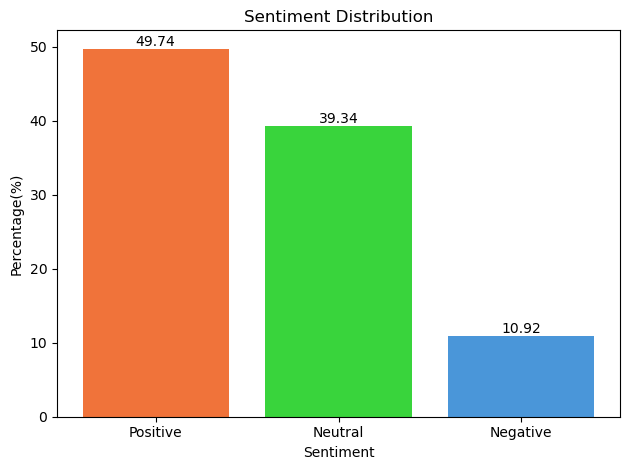

In [42]:
#Plot a bar chart:
labels = Summary.index
sizes = Summary['Percentage(%)']
colors = ['#f0733a', '#39d43c', '#4a96d9']

fig, ax = plt.subplots()
bars = ax.bar(labels, sizes, color=colors)

ax.set_xlabel('Sentiment')
ax.set_ylabel('Percentage(%)')
ax.set_title('Sentiment Distribution')

ax.bar_label(bars, labels=sizes, label_type='edge', color='black')

plt.tight_layout()
plt.show()

### 8.Sentiment Visualization:

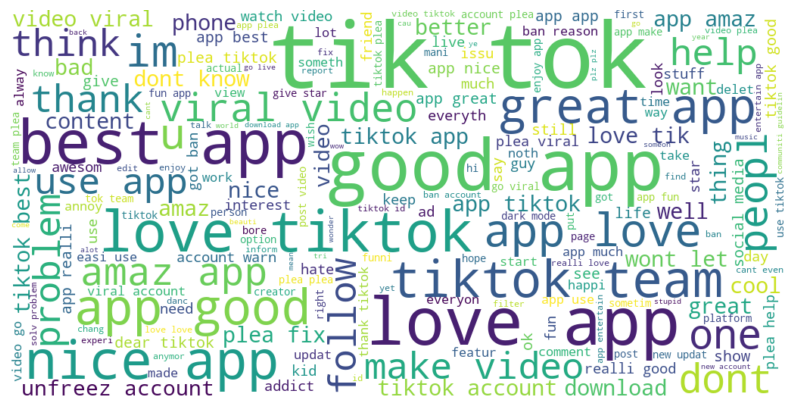

In [43]:
##Show word cloud:
all_review = " ".join(i for i in df_tk_review.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      width=1024, 
                      height=512, 
                      max_words=200, 
                      random_state=42, 
                      max_font_size=120, 
                      background_color='white').generate(all_review)
                      
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

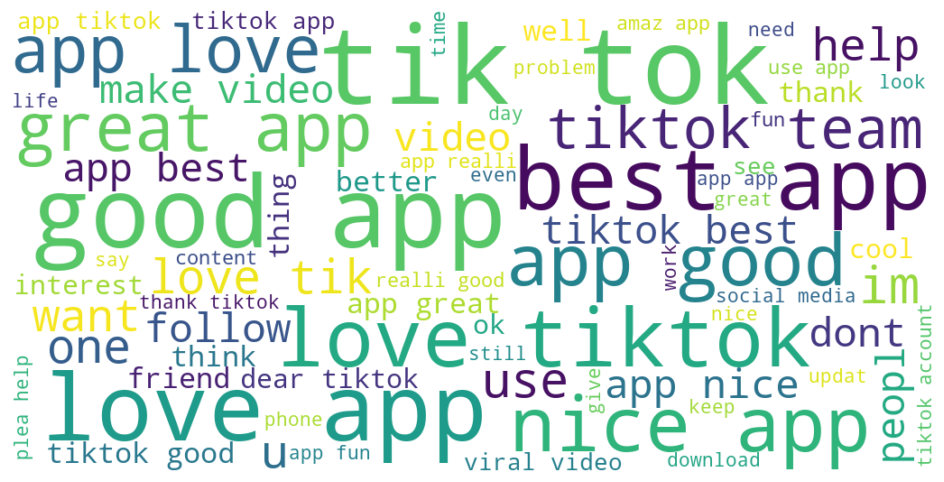

In [44]:
#word cloud for user review with only positive sentiments
positive_review = " ".join(i for i in df_tk_review[df_tk_review['Sentiment'] == 'Positive']['content'])

wordcloud = WordCloud(stopwords=stopwords,
                      width=1024, 
                      height=512, 
                      random_state=42,
                      max_words=70, 
                      max_font_size=120, 
                      background_color='white').generate(positive_review)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

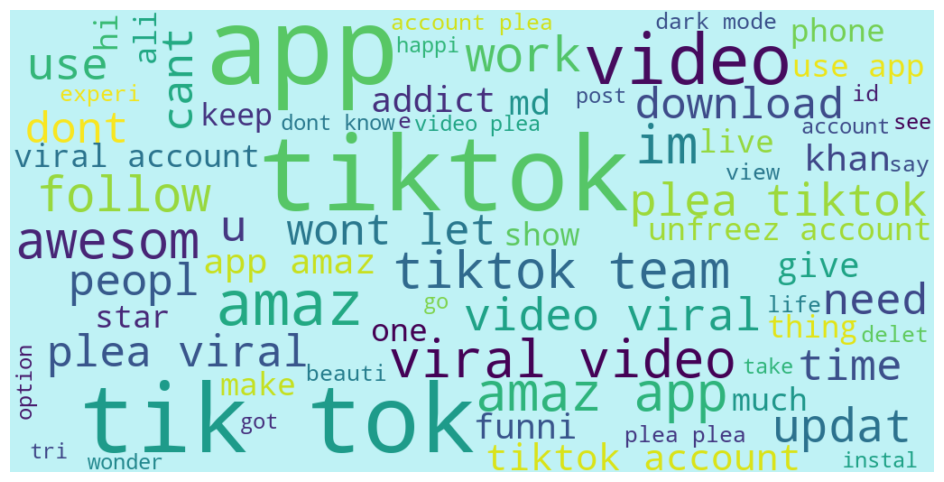

In [55]:
#word cloud for user review with only neutral sentiments
neutral_review = " ".join(i for i in df_tk_review[df_tk_review['Sentiment'] == 'Neutral']['content'])

wordcloud = WordCloud(stopwords=stopwords,
                      width=1024, 
                      height=512, 
                      random_state=42,
                      max_words=70, 
                      max_font_size=120, 
                      background_color='#bff2f5').generate(neutral_review)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

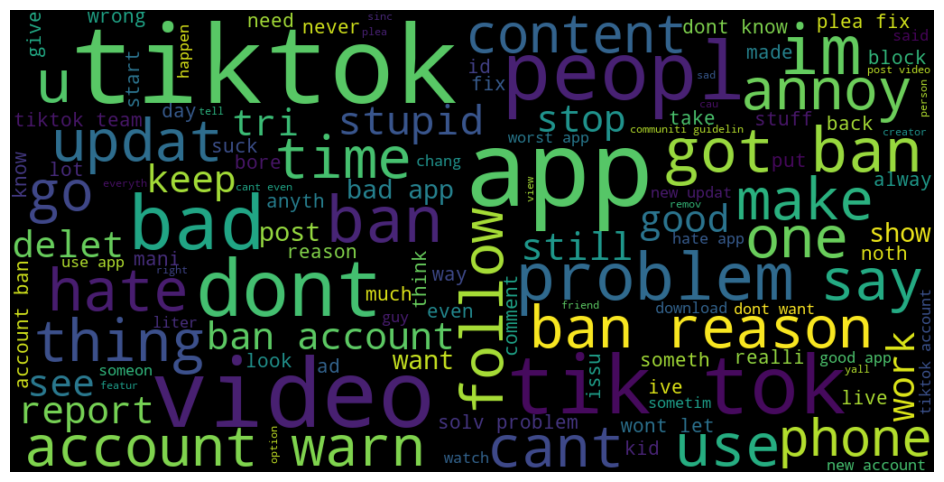

In [47]:
#word cloud for user review with only negative sentiments:
negative_review = " ".join(i for i in df_tk_review[df_tk_review['Sentiment'] == 'Negative']['content'])

wordcloud = WordCloud(width=1024, 
                      height=512, 
                      random_state=42,
                      max_words=120, 
                      max_font_size=120, 
                      background_color='black').generate(negative_review)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 9.Observations:

* The sentiment of TikTok users' reviews appears to be predominantly **positive**, accounting for 49.74% of the analyzed data.

* Among the analyzed user reviews, a significant portion (39.34%) expresses a **neutral** sentiment, while a minority (10.92%) conveys a **negative** sentiment.

* Some of the most common words in positive sentiment user reviews include "best", "good", "love", "nice", "great", and "fun".

* Some of the most common words in negative sentiment user reviews include "bad", "annoy", "hate", "stupid", "wrong", and "ban".

